# Time Series Analysis
## The Basics

### Converting a String Column or Index to DateTime Format - Rental Data Example
 
In order to generate predictions for Time series data, the columns must first be in DataTime format.

Certain strings, however, can prove to be rather tricky in this regard.

As one can see from the dataset below, these data need some serious preprocessing before Time series predictions can be performed.

For one, time data are stored as column names, rather than in a single column or index.

In [65]:
import pandas as pd
import os

df = pd.read_csv(os.path.join("..", "..", "data", "rental", "apt_rental_price_clean1.csv"))

print(df.shape)
df.head()

(2220, 83)


,city,state,bedroom_size,price_2014_01,price_2014_02,price_2014_03,price_2014_04,price_2014_05,price_2014_06,price_2014_07,...,price_2019_11,price_2019_12,price_2020_01,price_2020_02,price_2020_03,price_2020_04,price_2020_05,price_2020_06,price_2020_07,price_2020_08
0,New York,NY,Studio,1780,1778,1781,1786,1794,1802,1817,...,1940,1943,1939,1938,1939,1934,1923,1904,1886,1864
1,New York,NY,1br,1976,1975,1978,1983,1992,2001,2018,...,2155,2158,2153,2152,2153,2148,2135,2115,2094,2070
2,New York,NY,2br,2354,2352,2356,2362,2373,2384,2404,...,2567,2570,2565,2564,2565,2559,2543,2519,2494,2466
3,New York,NY,3br,3036,3033,3038,3046,3060,3074,3099,...,3310,3314,3307,3306,3308,3300,3279,3248,3216,3180
4,New York,NY,4br,3381,3378,3383,3392,3407,3424,3452,...,3686,3691,3684,3682,3684,3675,3652,3617,3582,3541


#### Preprocessing

In [66]:
# Transposing a Subset of the Data's Columns and Rows

subset = df[df.city == "New York"].T

print(subset.shape)
subset.head()

(83, 5)


,0,1,2,3,4
city,New York,New York,New York,New York,New York
state,NY,NY,NY,NY,NY
bedroom_size,Studio,1br,2br,3br,4br
price_2014_01,1780,1976,2354,3036,3381
price_2014_02,1778,1975,2352,3033,3378


In [67]:
subset.columns = subset.loc["bedroom_size"].values

print(subset.shape)
subset.head()

(83, 5)


,Studio,1br,2br,3br,4br
city,New York,New York,New York,New York,New York
state,NY,NY,NY,NY,NY
bedroom_size,Studio,1br,2br,3br,4br
price_2014_01,1780,1976,2354,3036,3381
price_2014_02,1778,1975,2352,3033,3378


In [68]:
city = subset["Studio"]["city"]
state = subset["Studio"]["state"]

subset.drop(["city", "state", "bedroom_size"], inplace=True)

print(subset.shape)
subset.head()

(80, 5)


,Studio,1br,2br,3br,4br
price_2014_01,1780,1976,2354,3036,3381
price_2014_02,1778,1975,2352,3033,3378
price_2014_03,1781,1978,2356,3038,3383
price_2014_04,1786,1983,2362,3046,3392
price_2014_05,1794,1992,2373,3060,3407


In [69]:
subset.insert(0, "city", [city] * len(subset.index))
subset.insert(1, "state", [state] * len(subset.index))

print(subset.shape)
subset.head()

(80, 7)


,city,state,Studio,1br,2br,3br,4br
price_2014_01,New York,NY,1780,1976,2354,3036,3381
price_2014_02,New York,NY,1778,1975,2352,3033,3378
price_2014_03,New York,NY,1781,1978,2356,3038,3383
price_2014_04,New York,NY,1786,1983,2362,3046,3392
price_2014_05,New York,NY,1794,1992,2373,3060,3407


#### String to DateTime Conversion

In [70]:
subset.index

Index(['price_2014_01', 'price_2014_02', 'price_2014_03', 'price_2014_04',
       'price_2014_05', 'price_2014_06', 'price_2014_07', 'price_2014_08',
       'price_2014_09', 'price_2014_10', 'price_2014_11', 'price_2014_12',
       'price_2015_01', 'price_2015_02', 'price_2015_03', 'price_2015_04',
       'price_2015_05', 'price_2015_06', 'price_2015_07', 'price_2015_08',
       'price_2015_09', 'price_2015_10', 'price_2015_11', 'price_2015_12',
       'price_2016_01', 'price_2016_02', 'price_2016_03', 'price_2016_04',
       'price_2016_05', 'price_2016_06', 'price_2016_07', 'price_2016_08',
       'price_2016_09', 'price_2016_10', 'price_2016_11', 'price_2016_12',
       'price_2017_01', 'price_2017_02', 'price_2017_03', 'price_2017_04',
       'price_2017_05', 'price_2017_06', 'price_2017_07', 'price_2017_08',
       'price_2017_09', 'price_2017_10', 'price_2017_11', 'price_2017_12',
       'price_2018_01', 'price_2018_02', 'price_2018_03', 'price_2018_04',
       'price_2018_05', '

In [71]:
print(type(subset.index[0]))
subset.index[0]

<class 'str'>


'price_2014_01'

As one can see below, by using the `to_datetime` method's `format` parameter, the string can then effectively parse out the Year and month elements, `Y` and `m`. In this example, the day is simply inferred.

For a full explanation of `format` string parsing, consult the [docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for Python's built-in datetime library.

In [72]:
subset.index = pd.to_datetime(subset.index, format="price_%Y_%m")
subset.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

### Resampling - Weather Data

Some data are simply way to numerous for data scientists to be able to glean useful data from directly. In this case resampling is useful in that it allows one to take averages of windows of a given length in the data. These windows reduce the frequency of the data, allowing data scientists to build scaleable predictive models for research or even production purposes.

In the example below, weather data have collected from a third-party API. A cursory analysis of the `date_time` index show that these data have been collected every 6 hours, with the data encompassing a period of 11 years. 

In [39]:
df2 = pd.read_csv(os.path.join("..", "..", "data", "weather", "new_york_ny.csv"), index_col="date_time")

print(df2.shape)
df2.head()

(17056, 24)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0,0,0.0,8.7,2,31,11:07 AM,10:50 PM,08:20 AM,05:40 PM,...,38,22,62,0.0,1017,-6,10,316,27,10007
2009-01-01 06:00:00,0,0,0.0,8.7,2,31,11:07 AM,10:50 PM,08:20 AM,05:40 PM,...,33,7,63,0.0,1023,-8,10,315,24,10007
2009-01-01 12:00:00,0,0,0.0,8.7,2,31,11:07 AM,10:50 PM,08:20 AM,05:40 PM,...,26,4,42,0.0,1025,-3,10,304,23,10007
2009-01-01 18:00:00,0,0,0.0,8.7,2,31,11:07 AM,10:50 PM,08:20 AM,05:40 PM,...,21,16,49,0.0,1025,-5,10,294,13,10007
2009-01-02 00:00:00,0,0,0.1,7.0,2,38,11:28 AM,11:54 PM,08:20 AM,05:41 PM,...,14,46,49,0.0,1023,-6,10,260,8,10007


In [40]:
df2.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

In [41]:
# Clearing out cluttering columns

df2 = df2[["tempC", "FeelsLikeC", "humidity", "precipMM", "totalSnow_cm"]]

print(df2.shape)
df2.head()

(17056, 5)


,tempC,FeelsLikeC,humidity,precipMM,totalSnow_cm
date_time,,,,,
2009-01-01 00:00:00,-6,-14,62,0.0,0.0
2009-01-01 06:00:00,-8,-16,63,0.0,0.0
2009-01-01 12:00:00,-3,-9,42,0.0,0.0
2009-01-01 18:00:00,-5,-10,49,0.0,0.0
2009-01-02 00:00:00,-6,-8,49,0.0,0.1


In [42]:
# Checking date_time index

df2.index

Index(['2009-01-01 00:00:00', '2009-01-01 06:00:00', '2009-01-01 12:00:00',
       '2009-01-01 18:00:00', '2009-01-02 00:00:00', '2009-01-02 06:00:00',
       '2009-01-02 12:00:00', '2009-01-02 18:00:00', '2009-01-03 00:00:00',
       '2009-01-03 06:00:00',
       ...
       '2020-09-01 12:00:00', '2020-09-01 18:00:00', '2020-09-02 00:00:00',
       '2020-09-02 06:00:00', '2020-09-02 12:00:00', '2020-09-02 18:00:00',
       '2020-09-03 00:00:00', '2020-09-03 06:00:00', '2020-09-03 12:00:00',
       '2020-09-03 18:00:00'],
      dtype='object', name='date_time', length=17056)

In [43]:
print(type(df2.index[0]))
df2.index[0]

<class 'str'>


'2009-01-01 00:00:00'

In [44]:
# Converting datetime index from string object to datetime

df2.index = pd.to_datetime(df2.index)
df2.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 06:00:00',
               '2009-01-01 12:00:00', '2009-01-01 18:00:00',
               '2009-01-02 00:00:00', '2009-01-02 06:00:00',
               '2009-01-02 12:00:00', '2009-01-02 18:00:00',
               '2009-01-03 00:00:00', '2009-01-03 06:00:00',
               ...
               '2020-09-01 12:00:00', '2020-09-01 18:00:00',
               '2020-09-02 00:00:00', '2020-09-02 06:00:00',
               '2020-09-02 12:00:00', '2020-09-02 18:00:00',
               '2020-09-03 00:00:00', '2020-09-03 06:00:00',
               '2020-09-03 12:00:00', '2020-09-03 18:00:00'],
              dtype='datetime64[ns]', name='date_time', length=17056, freq=None)

**Note here** that `freq=None`.

Given that the data have been pulled from the API with six hours between each datapoint, the data will need to be resampled in order to assign an appropriate frequency. This `freq` attribute on the `DatetimeIndex` class is essential for predictive modeling to be performed on the data.

`"MS"` as shown below indicates the data will be resample the data by the start of each month. The `.mean()` method indicates that the average of each monthly period is what will populate each column.

In [45]:
df2 = df2.resample("MS").mean()

print(df2.shape)
df2.head()

(141, 5)


,tempC,FeelsLikeC,humidity,precipMM,totalSnow_cm
date_time,,,,,
2009-01-01,-2.435484,-6.233871,72.959677,0.000000,0.016129
2009-02-01,1.267857,-1.848214,73.214286,0.000000,0.021429
2009-03-01,4.048387,2.145161,80.411290,0.000000,0.003226
2009-04-01,10.250000,9.525000,78.075000,0.005833,0.000000
2009-05-01,15.298387,16.008065,82.451613,0.000000,0.000000


Notice that `freq="MS"`.

In formal jargon, this frequency attribute is reffered to as a DateOffset Object.

For more information on this as well as resampling, consult the [Pandas Time series docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

In [46]:
df2.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='date_time', length=141, freq='MS')

### Predictions - Airline Passengers Example

#### Time Series Predictions

Unlike the predictive modeling taught in Unit 2 of Lambda School's data science program, the target in Time Series Predictions is not a separate, designated target column, but rather a single variable projected forward in time which is dependent not only on the independent time variable, but on its own historic values.

The **Airline Predictions** example shown below illustrates this.

In [48]:
df3 = pd.read_csv(os.path.join("..", "..", "data", "airline_passengers.csv"), index_col="Month")
df3.index = pd.to_datetime(df3.index)
df3.index.freq = "MS"

print(df3.shape)
df3.head()

(144, 1)


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [49]:
df3.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

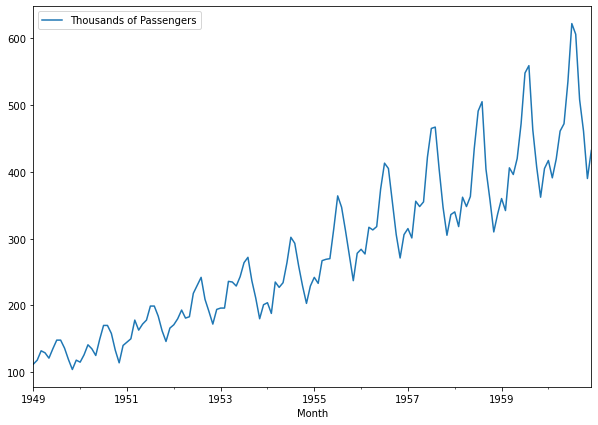

In [50]:
df3.plot(figsize=(10, 7));

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

warnings.filterwarnings(
    "ignore",
    message="After 0.13 initialization must be handled at model creation"
)

preds = ExponentialSmoothing(
    df3["Thousands of Passengers"],
    trend="add",
    seasonal="add",
    seasonal_periods=12
).fit().forecast(24)

In running this program, one may get the following future error.

``
/home/user/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
``

Note that it is important for any of the routes contained herein that one install the versions of all libraries, especially the *statsmodels* library, stated in the `requirements.txt` file contained in the root directory of this repository.

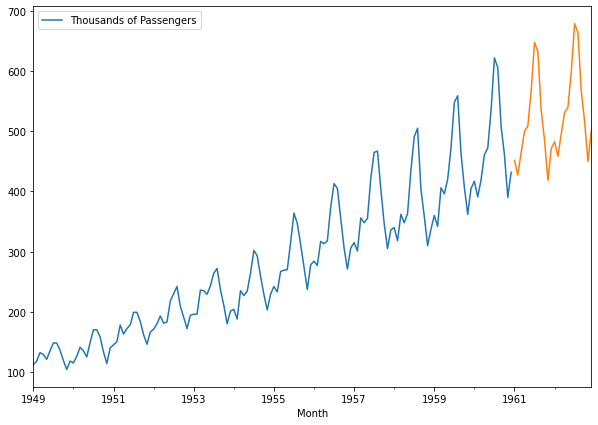

In [52]:
df3.plot(figsize=(10, 7))
preds.plot();